<p align="center">
    <img src="https://github.com/GeostatsGuy/GeostatsPy/blob/master/TCG_color_logo.png?raw=true" width="220" height="240" />

</p>

## Heterogeneity Metrics Demonstration

### Calculating Heterogeneity Metrics to Summarize Subsurface Heterogeneity Tutorial

* demonstrate various mathematical operations for statistical expectation with distributions

* the same workflow is and data is demonstrated in [Excel Heterogeneity Metrics](https://github.com/GeostatsGuy/ExcelNumericalDemos/blob/master/Heterogeneity_Metrics.xlsx).

#### Michael Pyrcz, Associate Professor, University of Texas at Austin 

##### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1) | [GeostatsPy](https://github.com/GeostatsGuy/GeostatsPy)

#### Heterogeneity Metrics

##### Applications with Measures of Heterogeneity

* Measures of heterogeneity are often applied proxy, approximate measures to indicate reservoir production / performance.  
* These measures may be applied to compare and rank reservoirs or reservoir model realizations for a single reservoir.  

##### Best Practice

* None of these metrics are perfect.  

* The best result possible from rigorous flow forecasting applied to good, full 3D reservoir models, use the physics when possible!

* Integrate all relevant information, at sufficient scale to resolve important features

###### Caution

* Use of simple heterogeneity measures for ranking reservoir and reservoir models can be dangerous.  

* Inaccuracy can result in incorrect rank estimates; therefore, incorrect business decisions.

###### Other Measures

* We just consider simple, static measures here

* I also have a Python demonstration for [Lorenz coefficient](https://github.com/GeostatsGuy/PythonNumericalDemos/blob/master/Lorenz_coefficient_demo.ipynb)

* Got your own measure?  You may develop a new metric. Novel methods for quantifying heterogeneity within reservoirs is a currently active area of research.

#### Objective 

Let's demonstate these heterogeneity metrics on a subsurface dataset.

#### Getting Started

Here's the steps to get setup in Python:

* Install Anaconda 3 on your machine (https://www.anaconda.com/download/).  

#### Load the Required Libraries

The following code loads the required libraries.

In [1]:
import numpy as np                                                # arrays
import pandas as pd                                               # dataframes
import scipy.stats as stats                                       # statistical functions
import matplotlib.pyplot as plt                                   # plotting
import math                                                       # square root to calculate standard deviation from variance

#### Set the working directory

I always like to do this so I don't lose files and to simplify subsequent read and writes (avoid including the full address each time). 

In [2]:
#os.chdir("c:/PGE383/Examples")             # set the working directory

#### Loading Tabular Data

Here's the command to load our comma delimited data file in to a Pandas' DataFrame object.

In [13]:
df = pd.read_csv('https://raw.githubusercontent.com/GeostatsGuy/GeoDataSets/master/PorPermSample1.csv')
df.head()

,Depth,Porosity,Perm
0,0.25,12.993634,265.528738
1,0.50,13.588011,116.891220
2,0.75,8.962625,136.920016
3,1.00,17.634879,216.668629
4,1.25,9.424404,131.594114


#### Feature Engineering

We will need to make a new feature, rock quality index, the ratio of permeability divided by porosity.

In [15]:
df['PermPor'] = df['Perm'].values/df['Porosity'].values
df.head()

,Depth,Porosity,Perm,PermPor
0,0.25,12.993634,265.528738,20.435295
1,0.50,13.588011,116.891220,8.602526
2,0.75,8.962625,136.920016,15.276776
3,1.00,17.634879,216.668629,12.286369
4,1.25,9.424404,131.594114,13.963124


#### Variance of Permeability

It is common to use the sample or population variance. I demonstrate the sample mean. 

\begin{equation}
\sigma_{X_k}^2 = \frac{1}{n} \sum_{i=1}^{n-1} (x_{k,i} - \overline{x_k})^2
\end{equation}

In [17]:
var_perm = np.var(df['Perm'].values,ddof=1)
print('Sample Variance of Permeability: ' + str(np.round(var_perm,2)) + ' mD^2')

Sample Variance of Permeability: 6544.83 mD^2


#### Coefficient of Variation of Permeability

Another common metric is the coefficient of variation, the standard deviation standardized by the mean.

\begin{equation}
C_{v_k} = \frac{\sigma_k}{\overline{k} }
\end{equation}

Note, by specifying the ddof arguement of 1, we are using the sample standard deviation in the calculation.

In [18]:
coefvar_perm = stats.variation(df['Perm'].values,ddof=1)
print('Coefficeint of Variation of Permeability: ' + str(np.round(coefvar_perm,3)) + ' unitless')

Coefficeint of Variation of Permeability: 0.502 unitless


#### Coefficient of Variation of Permeability / Porosity

Also it is common to calculate the coefficient of variation of the rock quality index feature, permeability divided by porosity.

\begin{equation}
C_{v_\frac{k}{\phi}} = \frac{\sigma_{\frac{k}{\phi}}}{\overline{\frac{k}{\phi}} }
\end{equation}

In [20]:
coefvar_permpor = stats.variation(df['PermPor'].values,ddof=1)
print('Coefficient of Variation of Permeability / Porosity: ' + str(np.round(coefvar_permpor,3)) + ' unitless')

Coefficient of Variation of Permeability / Porosity: 0.369 unitless


#### Dykstra Parsons

Now let's calculate the Dykstra-Parsons coefficient. 

\begin{equation}
DP = \frac{P50_k - P16_k}{P50_k}
\end{equation}

In [21]:
P16_perm = np.percentile(df['Perm'].values,16)
P50_perm = np.percentile(df['Perm'].values,50)

print('Permeability P16: ' + str(np.round(P16_perm,3)))
print('Permeability P50: ' + str(np.round(P50_perm,3)))

dp = (P50_perm - P16_perm)/P50_perm
print('\nDykstra-Parsons Coefficient: ' + str(np.round(dp,3)) + ' unitless')

Permeability P16: 84.797
Permeability P50: 144.33

Dykstra-Parsons Coefficient: 0.412 unitless


#### Dykstra-Parsons Improved by Fitting a Lognormal Distribution to Permeability

We may be able to improve our Dykstra-Parsons coefficient calculation by fitting a lognormal distibution to permeability and then using the parametric lognormal distribution to get a more accurate estimate of the P50 and P16 or permeability.

1. calculate the lognormal parameters, \mu (mu) and \sigma (sigma)
2. use the parametric lognormal CDF inverse to get the P50 and P16

In [22]:
mean_perm = np.average(df['Perm'].values)

mu = np.log((mean_perm**2)/math.sqrt(var_perm + mean_perm**2))
sigma = math.sqrt(np.log(var_perm/(mean_perm**2)+1))

print('Lognormal distribution parameters are, mu: ' + str(np.round(mu,2)) + ', and sigma: ' + str(np.round(sigma,2)))

Lognormal distribution parameters are, mu: 4.97, and sigma: 0.47


Now we can calculate the P50 and P16 of permeability from the fit lognormal distribution.

* Note, we could have been more rigorous with our distribution fit with a ordinary least squares or maximum likelihood approach.

In [10]:
P16_perm_lognorm = stats.lognorm.ppf(0.16,s = sigma, scale = math.exp(mu))
P50_perm_lognorm = stats.lognorm.ppf(0.50,s = sigma, scale = math.exp(mu))

print('Permeability P16 from Lognormal Parametric Distribution: ' + str(np.round(P16_perm_lognorm,3)))
print('Permeability P50 from Lognormal Parametric Distribution: ' + str(np.round(P50_perm_lognorm,3)))

Permeability P16 from Lognormal Parametric Distribution: 89.754
Permeability P50 from Lognormal Parametric Distribution: 143.869


In [11]:
dp_lognorm = (P50_perm_lognorm - P16_perm_lognorm)/P50_perm_lognorm
print('\nDykstra-Parsons Coefficient: ' + str(np.round(dp_lognorm,3)) + ' unitless')


Dykstra-Parsons Coefficient: 0.376 unitless


#### Visualize the Lognormal Permeability Parametric Distribution

Let's check our lognormal parametric distribution fit.

* we visualize the lognormal parametric CDF and the permeability data nonparametric distribution together to check the fit

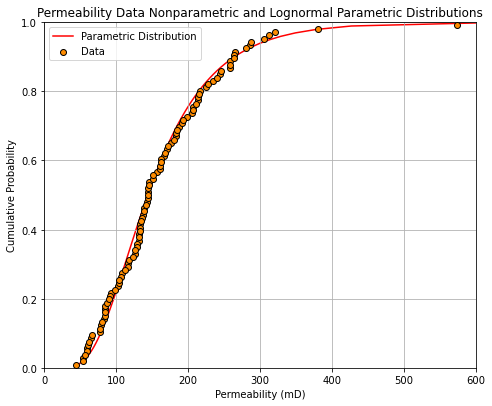

In [23]:
cumul_prob = np.linspace(0.01,0.999,100)
lognormal = stats.lognorm.ppf(cumul_prob,s = sigma, scale = math.exp(mu))

plt.plot(lognormal,cumul_prob,color='red',label='Parametric Distribution',zorder=1)
plt.xlabel('Permeability (mD)'); plt.ylabel('Cumulative Probability'); plt.title('Permeability Data Nonparametric and Lognormal Parametric Distributions')
plt.ylim([0,1]); plt.xlim([0,600]); plt.grid()
plt.scatter(df['Perm'].values,df["Perm"].rank()/(len(df)+1),color='darkorange',edgecolor='black',zorder=10,label='Data')
plt.legend(loc='upper left')

plt.subplots_adjust(left=0.0, bottom=0.0, right=1.0, top=1.2, wspace=0.3, hspace=0.4); plt.show()

#### Comments

This is a simple distribution of heterogeneity metrics.

Much more could be done, I have other demonstrations on the basics of working with DataFrames, ndarrays, univariate statistics, plotting data, declustering, data transformations, geostatistics, machine learning and many other workflows available at https://github.com/GeostatsGuy/PythonNumericalDemos and https://github.com/GeostatsGuy/GeostatsPy. 
  
I hope this was helpful,

*Michael*

#### The Author:

### Michael Pyrcz, Associate Professor, University of Texas at Austin 
*Novel Data Analytics, Geostatistics and Machine Learning Subsurface Solutions*

With over 17 years of experience in subsurface consulting, research and development, Michael has returned to academia driven by his passion for teaching and enthusiasm for enhancing engineers' and geoscientists' impact in subsurface resource development. 

For more about Michael check out these links:

#### [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)

#### Want to Work Together?

I hope this content is helpful to those that want to learn more about subsurface modeling, data analytics and machine learning. Students and working professionals are welcome to participate.

* Want to invite me to visit your company for training, mentoring, project review, workflow design and / or consulting? I'd be happy to drop by and work with you! 

* Interested in partnering, supporting my graduate student research or my Subsurface Data Analytics and Machine Learning consortium (co-PIs including Profs. Foster, Torres-Verdin and van Oort)? My research combines data analytics, stochastic modeling and machine learning theory with practice to develop novel methods and workflows to add value. We are solving challenging subsurface problems!

* I can be reached at mpyrcz@austin.utexas.edu.

I'm always happy to discuss,

*Michael*

Michael Pyrcz, Ph.D., P.Eng. Associate Professor The Hildebrand Department of Petroleum and Geosystems Engineering, Bureau of Economic Geology, The Jackson School of Geosciences, The University of Texas at Austin

#### More Resources Available at: [Twitter](https://twitter.com/geostatsguy) | [GitHub](https://github.com/GeostatsGuy) | [Website](http://michaelpyrcz.com) | [GoogleScholar](https://scholar.google.com/citations?user=QVZ20eQAAAAJ&hl=en&oi=ao) | [Book](https://www.amazon.com/Geostatistical-Reservoir-Modeling-Michael-Pyrcz/dp/0199731446) | [YouTube](https://www.youtube.com/channel/UCLqEr-xV-ceHdXXXrTId5ig)  | [LinkedIn](https://www.linkedin.com/in/michael-pyrcz-61a648a1)